In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   datetime64[ns]
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 500.0+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [30]:
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y')

In [11]:
df.describe()

,date_added,release_year
count,5332,5332.000000
mean,2019-04-28 19:27:46.316579072,2012.742123
min,2008-01-01 00:00:00,1942.000000
25%,2018-04-06 00:00:00,2011.000000
50%,2019-06-17 00:00:00,2016.000000
75%,2020-06-26 06:00:00,2018.000000
max,2021-09-24 00:00:00,2021.000000
std,NaN,9.625831


In [16]:
ratings_count = df['rating'].value_counts()
ratings_count

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

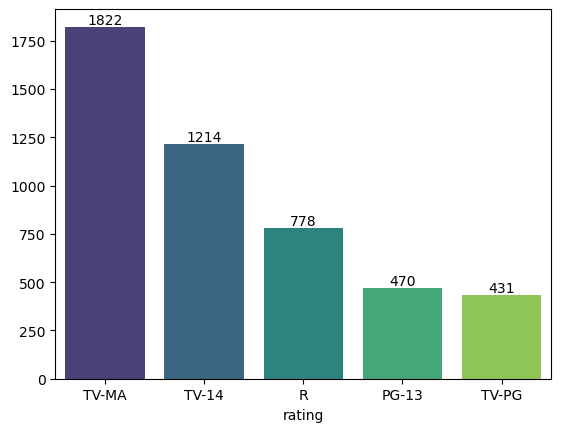

In [24]:
import warnings
warnings.filterwarnings('ignore')
ax = sns.barplot(y=ratings_count.values[:5],x=ratings_count.index[:5],palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## This tells us that most of the movies are TV-MA rated maybe in netflix this rated movies has more screen time compared to others.abs

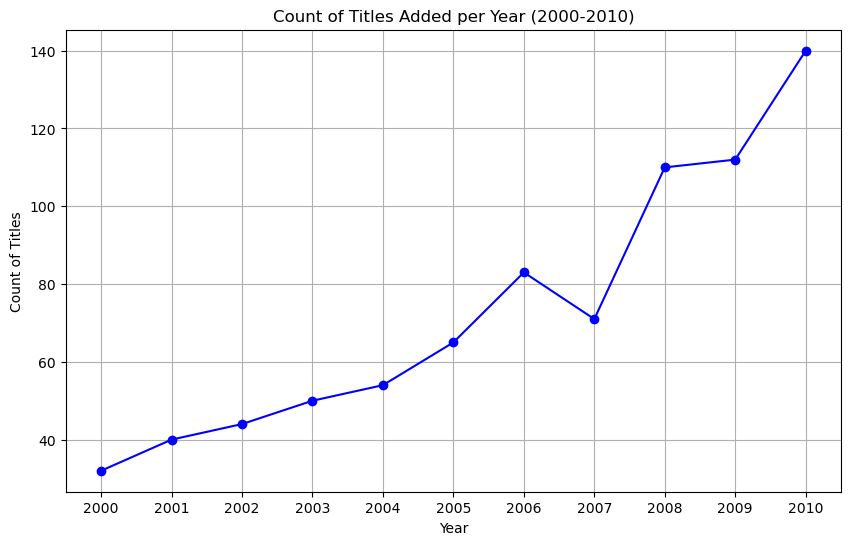

In [34]:
df['year_added'] = df['release_year'].dt.year
filtered_df = df[(df['year_added'] >= 2000) & (df['year_added'] <= 2010)]
titles_per_year = filtered_df.groupby('year_added')['title'].count()
plt.figure(figsize=(10, 6)) 
titles_per_year.plot(kind='line', marker='o', color='b')
plt.title('Count of Titles Added per Year (2000-2010)')
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.grid(True)
plt.xticks(titles_per_year.index)
plt.show()

## Number of movies added each year from 2002 is increasing gradually this tells us producers are trusting our platforms reasons can be:
    1. Due to increasing audience 
    2. Due to producers generating more revenue from our platform compared to other

In [36]:
country_movies = df.groupby('country')['title'].count().sort_values(ascending=False).head()
country_movies

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Name: title, dtype: int64

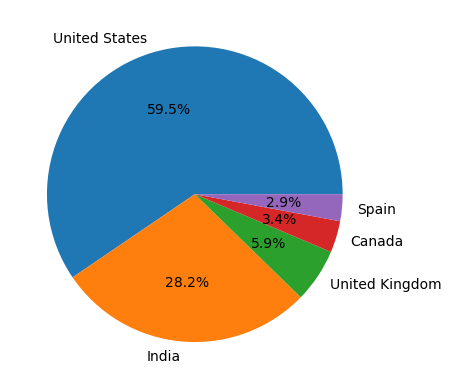

In [39]:
plt.pie(x=country_movies,labels=country_movies.index,autopct='%.1f%%')
plt.show()

## Most of the movies in netflix are from US and India this tells us Netflix's more than 50% of revenue is generated from these two countries.

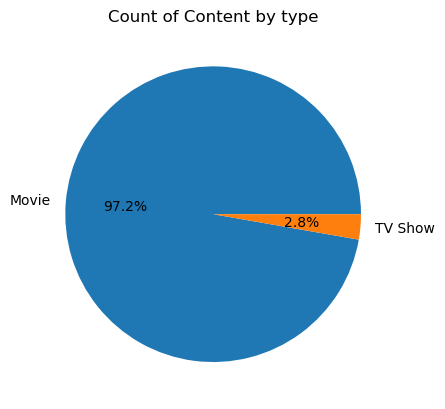

In [43]:
type_title = df.groupby('type')['title'].count().sort_values(ascending=False)
plt.pie(x=type_title,autopct='%.1f%%',labels=type_title.index)
plt.title("Count of Content by type")
plt.show()

## In Netflix most of the content is of movies ,so screen time will be greater than TV shows ,the more revenue is generated from movies compared to TV shows